# 生成均差表

In [1]:
import numpy as np
x_sample = np.array([0,1,4,9,16,25,36,49,64])
y_sample = np.array([0,1,2,3,4,5,6,7,8])
diff = np.zeros((10,9))
for i in range(9):
    diff[0][i] = x_sample[i]
    diff[1][i] = y_sample[i]
for diff_index in range(1,9):
    for i in range(diff_index,9):
        diff[diff_index+1][i] = (diff[diff_index][i]-diff[diff_index][i-1])/(diff[0][i]-diff[0][i-diff_index])
diff

array([[ 0.00000000e+00,  1.00000000e+00,  4.00000000e+00,
         9.00000000e+00,  1.60000000e+01,  2.50000000e+01,
         3.60000000e+01,  4.90000000e+01,  6.40000000e+01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         3.00000000e+00,  4.00000000e+00,  5.00000000e+00,
         6.00000000e+00,  7.00000000e+00,  8.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  3.33333333e-01,
         2.00000000e-01,  1.42857143e-01,  1.11111111e-01,
         9.09090909e-02,  7.69230769e-02,  6.66666667e-02],
       [ 0.00000000e+00,  0.00000000e+00, -1.66666667e-01,
        -1.66666667e-02, -4.76190476e-03, -1.98412698e-03,
        -1.01010101e-03, -5.82750583e-04, -3.66300366e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.66666667e-02,  7.93650794e-04,  1.32275132e-04,
         3.60750361e-05,  1.29500130e-05,  5.55000555e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.92063492e-04, -2.755731

# 牛顿插值法

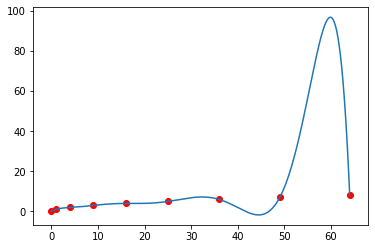

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(0,64,1000)
y_newton = diff[1][0]+diff[2][1]*(x-x_sample[0])+diff[3][2]*(x-x_sample[0])*(x-x_sample[1])+diff[4][3]*(x-x_sample[0])*(x-x_sample[1])*(x-x_sample[2])\
+diff[5][4]*(x-x_sample[0])*(x-x_sample[1])*(x-x_sample[2])*(x-x_sample[3])\
+diff[6][5]*(x-x_sample[0])*(x-x_sample[1])*(x-x_sample[2])*(x-x_sample[3])*(x-x_sample[4])\
+diff[7][6]*(x-x_sample[0])*(x-x_sample[1])*(x-x_sample[2])*(x-x_sample[3])*(x-x_sample[4])*(x-x_sample[5])\
+diff[8][7]*(x-x_sample[0])*(x-x_sample[1])*(x-x_sample[2])*(x-x_sample[3])*(x-x_sample[4])*(x-x_sample[5])*(x-x_sample[6])\
+diff[9][8]*(x-x_sample[0])*(x-x_sample[1])*(x-x_sample[2])*(x-x_sample[3])*(x-x_sample[4])*(x-x_sample[5])*(x-x_sample[6])*(x-x_sample[7])
plt.plot(x,y_newton)
plt.scatter(x_sample,y_sample,c='red')
plt.show()

# 三次样条插值法

In [3]:
h = np.zeros(8)
lamda = np.zeros(7)
mu = np.zeros(7)
for i in range(8):
    h[i] = x_sample[i+1] - x_sample[i]
for i in range(7):
    lamda[i] = h[i+1]/(h[i+1]+h[i])
    mu[i] = 1-lamda[i]
print(h)
print(lamda)
print(mu)

[ 1.  3.  5.  7.  9. 11. 13. 15.]
[0.75       0.625      0.58333333 0.5625     0.55       0.54166667
 0.53571429]
[0.25       0.375      0.41666667 0.4375     0.45       0.45833333
 0.46428571]


In [4]:
A = np.zeros((9,9))
for row in range(9):
    A[row][row] = 2
A[0][1] = 1
A[8][7] = 1
for row in range(1,8):
    A[row][row-1] = mu[row-1]
    A[row][row+1] = lamda[row-1]
A

array([[2.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.25      , 2.        , 0.75      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.375     , 2.        , 0.625     , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.41666667, 2.        , 0.58333333,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.4375    , 2.        ,
        0.5625    , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.45      ,
        2.        , 0.55      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45833333, 2.        , 0.54166667, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46428571, 2.        , 0.53571429],


In [5]:
b = diff[3][np.where(diff[3]!=0)]
b

array([-0.16666667, -0.01666667, -0.0047619 , -0.00198413, -0.0010101 ,
       -0.00058275, -0.0003663 ])

In [6]:
# 一阶边界条件中，0点的一阶导数不存在，直接假设0点的一阶导为10
boundary_start = 10
boundary_end = 1/16
start = (diff[2][0]-boundary_start)/(diff[0][1]-diff[0][0])
end = (boundary_end-diff[2][8])/(diff[0][8]-diff[0][7])
b = np.insert(b,0,start)
b = np.append(b,end)

In [7]:
b = b * 6
b.shape

(9,)

In [8]:
A_inverse = np.linalg.inv(A)
M = np.matmul(A_inverse, b)
M

array([-3.18960606e+01,  3.79212127e+00, -8.13636500e-01,  1.68364039e-01,
       -4.50587982e-02,  8.09523079e-03, -3.59019717e-03, -4.87814081e-05,
       -8.08942629e-04])

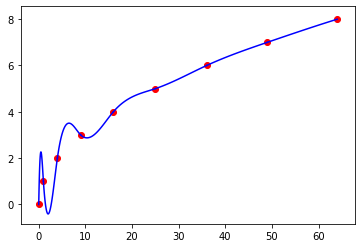

In [9]:
x1 = np.linspace(0,1,100)
k = 0
y_spline1 = M[k]*(diff[0][k+1]-x1)**3/(6*h[k]) + M[k+1]*(x1-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x1)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x1-diff[0][k])/h[k]
x2 = np.linspace(1,4,100)
k = 1
y_spline2 = M[k]*(diff[0][k+1]-x2)**3/(6*h[k]) + M[k+1]*(x2-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x2)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x2-diff[0][k])/h[k]
x3 = np.linspace(4,9,100)
k = 2
y_spline3 = M[k]*(diff[0][k+1]-x3)**3/(6*h[k]) + M[k+1]*(x3-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x3)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x3-diff[0][k])/h[k]
x4 = np.linspace(9,16,100)
k = 3
y_spline4 = M[k]*(diff[0][k+1]-x4)**3/(6*h[k]) + M[k+1]*(x4-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x4)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x4-diff[0][k])/h[k]
x5 = np.linspace(16,25,100)
k = 4
y_spline5 = M[k]*(diff[0][k+1]-x5)**3/(6*h[k]) + M[k+1]*(x5-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x5)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x5-diff[0][k])/h[k]
x6 = np.linspace(25,36,100)
k = 5
y_spline6 = M[k]*(diff[0][k+1]-x6)**3/(6*h[k]) + M[k+1]*(x6-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x6)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x6-diff[0][k])/h[k]
x7 = np.linspace(36,49,100)
k = 6
y_spline7 = M[k]*(diff[0][k+1]-x7)**3/(6*h[k]) + M[k+1]*(x7-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x7)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x7-diff[0][k])/h[k]
x8 = np.linspace(49,64,100)
k = 7
y_spline8 = M[k]*(diff[0][k+1]-x8)**3/(6*h[k]) + M[k+1]*(x8-diff[0][k])**3/(6*h[k])\
+ (diff[1][k]-M[k]*h[k]**2/6)*(diff[0][k+1]-x8)/h[k] + (diff[1][k+1]-M[k+1]*h[k]**2/6)*(x8-diff[0][k])/h[k]
plt.plot(x1,y_spline1,c='blue')
plt.plot(x2,y_spline2,c='blue')
plt.plot(x3,y_spline3,c='blue')
plt.plot(x4,y_spline4,c='blue')
plt.plot(x5,y_spline5,c='blue')
plt.plot(x6,y_spline6,c='blue')
plt.plot(x7,y_spline7,c='blue')
plt.plot(x8,y_spline8,c='blue')
plt.scatter(x_sample,y_sample,c='red')
plt.show()

# 结论

从得到结果看，在[0,64]上，三次样条插值更精确；在[0,1]上，牛顿插值法更精确。